In [1]:
pkg load io
pkg load signal
pkg load control

disp('HEAVY WEIGHT TRUCKS SOLD') 
trucks=csvread(
"C:/Users/dishi/TFG-LDHR/MY_DATA/trucks.csv");
trucks=trucks(303:685,2); % column 2 is monthly not seasonally adjusted data from 02-1992 to 12-2023

size(trucks) % dimension to for time vector

HEAVY WEIGHT TRUCKS SOLD
ans =

   383     1



In [2]:
disp('TOOLBOX CONFIGURATION')
e4init % E4 toolbox 

TOOLBOX CONFIGURATION

                      EEEEEEEEE   444  444
                     EEEEEEEEEEE  444  444
                     EEE          44444444
                     EEE           4444444
                     EEEEEEE           444
                     EEEEEEE           444
                     EEE
                     EEE
                     EEEEEEEEEE
                      EEEEEEEE

Toolbox for State Space Estimation of Econometric Models
                   Version  JAN-2012

Web: www.ucm.es/info/icae/e4
    sete4opt at line 36 column 44
    e4init at line 48 column 1

 
*********************** Options set by user ********************
Filter. . . . . . . . . . . . . : KALMAN
Scaled B and M matrices . . . . : NO
Initial state vector. . . . . . : AUTOMATIC SELECTION
Initial covariance of state v.  : IDEJONG
Variance or Cholesky factor? .  : VARIANCE
Optimization algorithm. . . . . : BFGS
Maximum step length . . . . . . : 0.100000
Stop tolerance. . . . . . . . . : 0.000010
Max. n

In [3]:
disp('LDHR code')
PaPtrucks=12./(0:6) % vector con periodos correspondientes a la estacionalidad para datos mensuales. 
TVPaPtrucks=[1 1 1 1 1 1 1;1 0 0 0 0 0 0] 
warning('off','all');
[VARtrucks,Ptrucks,TVPtrucks,oartrucks]=autodhr(trucks,12,[],[],PaPtrucks,TVPaPtrucks,1) 
NVRtrucks=VARtrucks(2:8)./VARtrucks(1) % calculation of the variances of the DHR components
filt=0;
[trendtrucks,seasontrucks,cycletrucks,irregtrucks]=dhrfilt(trucks,Ptrucks,TVPtrucks,VARtrucks,12,filt,0);

LDHR code
PaPtrucks =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPaPtrucks =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

VARtrucks =

 Columns 1 through 6:

   1.2503e+00   2.5020e-02   2.2568e-02   3.8946e-03   6.5374e-03   3.4359e-02

 Columns 7 and 8:

   1.4329e-02   6.4346e-03

Ptrucks =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPtrucks =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

oartrucks = 26
NVRtrucks =

 Columns 1 through 6:

   2.0011e-02   1.8050e-02   3.1149e-03   5.2286e-03   2.7480e-02   1.1460e-02

 Column 7:

   5.1464e-03



MONTHLY DATA FOR TRUCKS, TREND


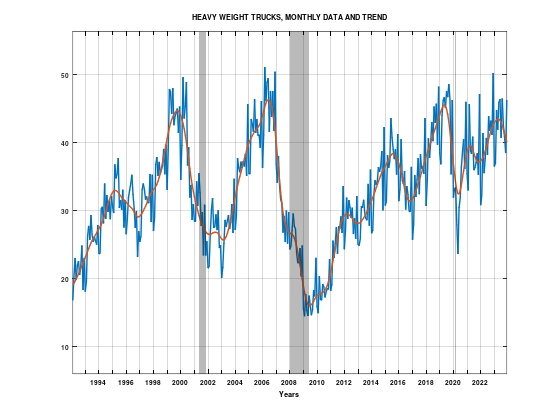

In [46]:
disp('MONTHLY DATA FOR TRUCKS, TREND')
trendtrucks=trendtrucks(:,1); % the first column of trend is the trend vector
figure(1)

startDate = datenum(1992, 2, 1);  % February 1992
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(trendtrucks));  % Generate dates
dates=dates';

plot(dates,[trucks,trendtrucks],'linewidth',1.4)
grid on
title('HEAVY WEIGHT TRUCKS, MONTHLY DATA AND TREND')


xlim([startDate endDate]);

years = 1992:2023;
xTicks = datenum(years, 1, 1);
set(gca, 'XTick', xTicks);


xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
for i = 2:2:length(xLabels)
    xLabels{i} = ''; % Remove every other label
end
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

recession_periods = [
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

ylim([min(trendtrucks) - 10, max(trendtrucks) + 10]);
y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;  

In [5]:
disp('CREATING TIME VECTOR')
time=timefmt4(12,1992,2,383); % last input = number of rows of heavy weight trucks and housing units started
time=time(3:end,:); % we start from third obs since we need the time of differenced trend (1st obs = stringname obs)
disp('FIRST DIFFERENCE OF TREND')
dtrendtrucks=diff(trendtrucks); % first difference of trend vector
size(time)
size(dtrendtrucks)

CREATING TIME VECTOR
FIRST DIFFERENCE OF TREND
ans =

   382    12

ans =

   382     1



In [31]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedrectrucks = []; % array to store the indices of confirmation of a recession

for i = 2:(length(dtrendtrucks) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendtrucks(i:i+window-1) < 0) && dtrendtrucks(i-1) > 0 
        confirmedrectrucks=[confirmedrectrucks, i]; % if the condition is met, store the index of the first negative element
    end
end

disp('First negative element preceded by a positive value followed by 6 consecutive negative values:');
confirmedrectrucks=confirmedrectrucks'; % to column vector from row vector 
size(dtrendtrucks); % the vector we are using
size(time); % checking time vector size
recessiontimetrucks=time(confirmedrectrucks,:); % DATES OF CONFIRMED RECESSION
recessiontrucks=dtrendtrucks(confirmedrectrucks,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
First negative element preceded by a positive value followed by 6 consecutive negative values:


In [52]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexptrucks = []; % array to store the indices of confirmation of an expansion

for i = 2:(length(dtrendtrucks) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendtrucks(i:i+window-1) > 0) && dtrendtrucks(i-1) < 0 
        confirmedexptrucks = [confirmedexptrucks, i]; % if the condition is met, store the index of the first positive element
    end
end

disp('First positive element preceded by a negative value followed by 6 consecutive positive values:');
confirmedexptrucks = confirmedexptrucks'; % to column vector from row vector 
size(dtrendtrucks); % the vector we are using
size(time); % checking time vector size
expansiontimetrucks = time(confirmedexptrucks,:); % DATES OF CONFIRMED EXPANSION
expansiontrucks = dtrendtrucks(confirmedexptrucks,:); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1992, 2, 1);  % February 1992
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dtrendtrucks));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedrectrucks and confirmedexptrucks indices to dates
recessionindtrucks = dates(confirmedrectrucks);
expansionindtrucks = dates(confirmedexptrucks);

CONFIRMATION OF AN EXPANSION
First positive element preceded by a negative value followed by 6 consecutive positive values:


PLOTTING TREND WITH RECESSION AND EXPANSION DATES


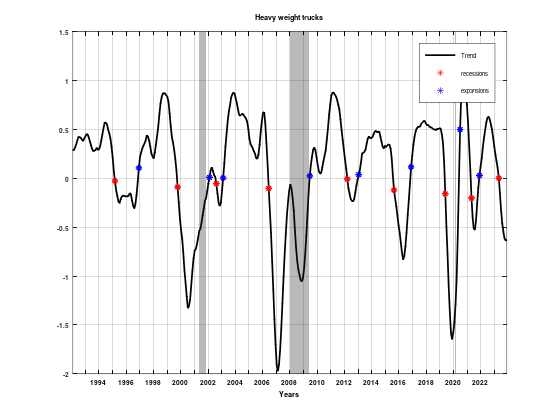

In [53]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')

figure(2)
plot(dates,dtrendtrucks,'k','linewidth',1.7)
hold on
plot(recessionindtrucks, recessiontrucks, 'r*', 'linewidth', 1.5); % red are recessions
plot(expansionindtrucks, expansiontrucks, 'b*', 'linewidth', 1.5); % blue are expansions
grid on

xlim([startDate endDate]);

years = 1992:2023;
xTicks = datenum(years, 1, 1);
set(gca, 'XTick', xTicks);


xLabels = arrayfun(@num2str, years, 'UniformOutput', false);

for i = 2:2:length(xLabels)
    xLabels{i} = ''; % Remove every other label
end
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

recession_periods = [
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;
hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end

title('DIFFERENCED TREND, HEAVY WEIGHT TRUCKS')
legend('First difference of trend','recessions','expansions')
hold off; 

In [54]:
disp('DATES OF EXPANSIONS AND RECESSIONS')
disp('Heavy weight trucks')
expansiontimetrucks % date when trend derivative >0
recessiontimetrucks % date when trend derivative <0
disp('Heavy weight trucks show a lagging nature in some periods and a leading nature in other periods')

DATES OF EXPANSIONS AND RECESSIONS
Heavy weight trucks
expansiontimetrucks =

1997-01-01  
2002-03-01  
2003-03-01  
2009-07-01  
2013-02-01  
2016-12-01  
2020-07-01  
2021-12-01  

recessiontimetrucks =

1995-04-01  
1999-11-01  
2002-09-01  
2006-07-01  
2012-04-01  
2015-09-01  
2019-06-01  
2021-05-01  
2023-05-01  

Heavy weight trucks show a lagging nature in some periods and a leading nature in other periods


In [55]:
disp('NON-DEFENSE CAPITAL GOODS DATASET')

capital=csvread(
"C:/Users/dishi/TFG-LDHR/MY_DATA/capital.csv");
capital=capital(2:384,2); % column 2 is monthly not seasonally adjusted data from 02-1992 to 12-2023
size(capital) % dimension to for time vector
capital;

timecapital=timefmt4(12,1992,2,383);
timecapital=timecapital(3:end,:); % getting rid of first obs to match differenced trend

PaPcapital=12./(0:6) % vector con periodos correspondientes a la estacionalidad para datos mensuales. 
TVPaPcapital=[1 1 1 1 1 1 1;1 0 0 0 0 0 0] 

[VARcapital,Pcapital,TVPcapital,oarcapital]=autodhr(capital,12,[],[],PaPcapital,TVPaPcapital,1) 
NVRcapital=VARcapital(2:8)./VARcapital(1) % calculation of variance ratios 
filt=0;
[trendcapital,seasoncapital,cyclecapital,irregcapital]=dhrfilt(capital,Pcapital,TVPcapital,VARcapital,12,filt,0);

NON-DEFENSE CAPITAL GOODS DATASET
ans =

   383     1

PaPcapital =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPaPcapital =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

VARcapital =

 Columns 1 through 6:

   1.0657e+06   2.4376e+04   2.2185e+04   3.0132e+03   2.2045e+03   4.1797e+04

 Columns 7 and 8:

   4.8047e+03            0

Pcapital =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPcapital =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

oarcapital = 36
NVRcapital =

   0.022873   0.020817   0.002827   0.002069   0.039220   0.004508          0



NEW DATA, TREND


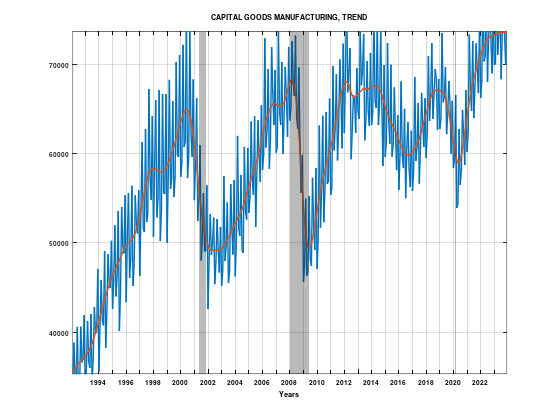

In [56]:
disp('NEW DATA, TREND')
trendcapital=trendcapital(:,1); % the first column of trend is the trend vector

% Generate the dates vector
startDate = datenum(1992, 2, 1);  % February 1992
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(trendcapital));  % Generate dates
dates = dates';  % Ensure dates is a column vector

figure(3)
plot(dates,[capital,trendcapital],'linewidth',1.4)
grid on
title('CAPITAL GOODS MANUFACTURING, TREND')

dtrendcapital=diff(trendcapital); % first difference of trend vector

xlim([startDate endDate]);

years = 1992:2023;
xTicks = datenum(years, 1, 1);
set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);

for i = 2:2:length(xLabels)
    xLabels{i} = ''; % Remove every other label
end
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');


recession_periods = [
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

ylim([min(trendcapital) - 90, max(trendcapital) + 90]);  % Adjust as needed

y_lim = ylim;
hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;  

In [57]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedreccapital = []; % array to store the indices of confirmation of a recession
% Loop through the elements of dtrend
for i = 2:(length(dtrendcapital) - window + 1) % starts at the 2nd element to see if the first one is preceded by a positive value
    if all(dtrendcapital(i:i+window-1) < 0) && dtrendcapital(i-1) > 0 
        confirmedreccapital = [confirmedreccapital, i]; % store the index of the first negative element
    end
end
disp('Indices of the first negative element of dtrendcapital preceded by a positive value followed by 6 consecutive negative values:');
confirmedreccapital = confirmedreccapital'; % convert to column vector from row vector 
size(dtrendcapital); % check the size of the vector we are using
size(timecapital); % check the size of the time vector
recessiontimecapital = timecapital(confirmedreccapital,:); % DATES OF CONFIRMED RECESSION
recessioncapital = dtrendcapital(confirmedreccapital,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
Indices of the first negative element of dtrendcapital preceded by a positive value followed by 6 consecutive negative values:


In [59]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexpcapital = []; % array to store the indices of confirmation of an expansion
% Loop through the elements of dtrendcapital
for i = 2:(length(dtrendcapital) - window + 1) % starts at the 2nd element to see if the first one is preceded by a negative value
    if all(dtrendcapital(i:i+window-1) > 0) && dtrendcapital(i-1) < 0 
        confirmedexpcapital = [confirmedexpcapital, i]; % store the index of the first positive element
    end
end
disp('Indices of the first positive element of dtrendcapital preceded by a negative value followed by 6 consecutive positive values:');
confirmedexpcapital = confirmedexpcapital'; % convert to column vector from row vector 
size(dtrendcapital); % check the size of the vector we are using
size(timecapital); % check the size of the time vector
expansiontimecapital = timecapital(confirmedexpcapital,:); % DATES OF CONFIRMED EXPANSION
expansioncapital = dtrendcapital(confirmedexpcapital,:); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1992, 2, 1);  % February 1992
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dtrendcapital));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedrectrucks and confirmedexptrucks indices to dates
recessionindcapital = dates(confirmedreccapital);
expansionindcapital = dates(confirmedexpcapital);

CONFIRMATION OF AN EXPANSION
Indices of the first positive element of dtrendcapital preceded by a negative value followed by 6 consecutive positive values:


PLOTTING TREND WITH RECESSION AND EXPANSION DATES


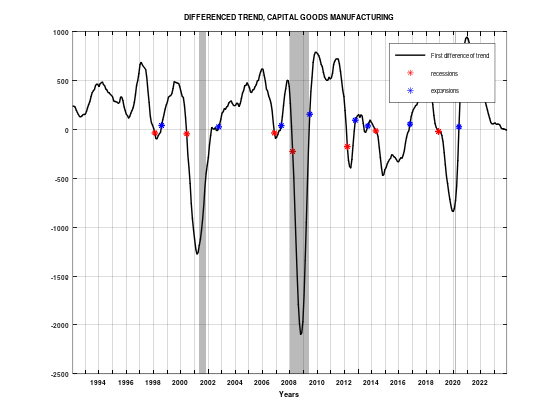

In [60]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')

figure(4)
plot(dates,dtrendcapital,'k','linewidth',1.4)
hold on
plot(recessionindcapital,recessioncapital,'r*','linewidth',1.3) % red are recessions
plot(expansionindcapital,expansioncapital,'b*','linewidth',1.3) % blue are expansions

xlim([startDate endDate]);

years = 1992:2023;
xTicks = datenum(years, 1, 1);
set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);

for i = 2:2:length(xLabels)
    xLabels{i} = ''; % Remove every other label
end
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

recession_periods = [
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;
hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end


grid on
title('DIFFERENCED TREND, CAPITAL GOODS MANUFACTURING')
legend('First difference of trend','recessions','expansions')

In [61]:
disp('DATES OF EXPANSIONS AND RECESSIONS')
disp('Steel manufacturing New Orders')
expansiontimecapital % date when trend derivative >0
recessiontimecapital % date when trend derivative <0
disp('Capital dataset simillar to coincident indicator')

DATES OF EXPANSIONS AND RECESSIONS
Steel manufacturing New Orders
expansiontimecapital =

1998-09-01  
2002-11-01  
2007-06-01  
2009-07-01  
2012-11-01  
2013-10-01  
2016-11-01  
2020-06-01  

recessiontimecapital =

1998-03-01  
2000-07-01  
2006-12-01  
2008-04-01  
2012-04-01  
2014-05-01  
2018-12-01  

Capital dataset simillar to coincident indicator


In [68]:
disp('AVERAGE WEEKLY HOURS WORKED IN MANUFACTURING, MONTHLY, NOT ADJUSTED')
% IT IS A PROXY FOR THE IDLENESS OF THE ECONOMY 
idle=csvread(
"C:/Users/dishi/TFG-LDHR/MY_DATA/idle.csv");

idle=idle(639:1021,2); % column 2 and from 02-1992 to 12-2023
size(idle) % dimension
timeidle=timefmt4(12,1992,2,383); % monthly dates vector
timeidle=timeidle(3:end,:); % from 2'nd date since we need it to match the differenced vector
size(timeidle)

PaPidle=12./(0:6) % divide by the half of the observations per year, due to harmonics
TVPaPidle=[1 1 1 1 1 1 1;1 0 0 0 0 0 0] 

[VARidle,Pidle,TVPidle,oaridle]=autodhr(idle,12,[],[],PaPidle,TVPaPidle,1) 
NVRidle=VARidle(2:8)./VARidle(1) % calculation of variance ratios 
filt=0;
[trendidle,seasonidle,cycleidle,irregidle]=dhrfilt(idle,Pidle,TVPidle,VARidle,12,filt,0);

AVERAGE WEEKLY HOURS WORKED IN MANUFACTURING, MONTHLY, NOT ADJUSTED
ans =

   383     1

ans =

   382    12

PaPidle =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPaPidle =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

VARidle =

 Columns 1 through 7:

   0.026946   0.000223   0.002341   0.000382   0.000005   0.000192   0.000003

 Column 8:

          0

Pidle =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPidle =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

oaridle = 36
NVRidle =

   0.008292   0.086889   0.014168   0.000186   0.007131   0.000104          0



HOURS WORKED IN MANUF AND ITS TREND


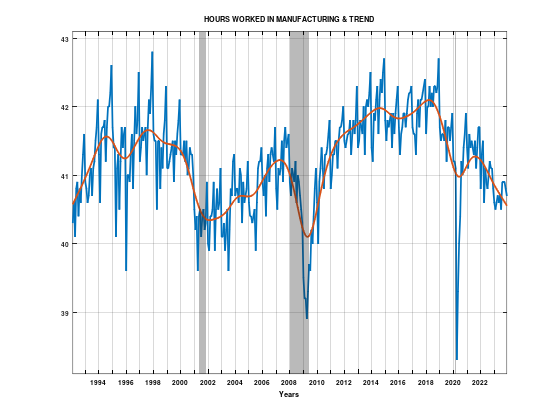

In [92]:
disp('HOURS WORKED IN MANUF AND ITS TREND')

trendidle=trendidle(:,1); % the first column of trend is the trend vector

% Generate the dates vector
startDate = datenum(1992, 2, 1);  % February 1992
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(trendidle));  % Generate dates
dates = dates';  % Ensure dates is a column vector

figure(5)
plot(dates,[idle,trendidle],'linewidth',1.7)
grid on
title('HOURS WORKED IN MANUFACTURING & TREND')
dtrendidle=diff(trendidle); % first difference of trend vector

xlim([startDate endDate]);

years = 1992:2023;
xTicks = datenum(years, 1, 1);
set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);

for i = 2:2:length(xLabels)
    xLabels{i} = ''; % Remove every other label
end
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

recession_periods = [
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1);     % February 2020 to March 2020
];

ylim([min(trendidle) - 2, max(trendidle) + 1]);  % Adjust as needed

y_lim = ylim;
hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end

hold off;  

In [93]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedrecidle = []; % array to store the indices of confirmation of a recession
% Loop through the elements of dtrend
for i = 2:(length(dtrendidle) - window + 1) % starts at the 2nd element to see if the first one is preceded by a positive value
    if all(dtrendidle(i:i+window-1) < 0) && dtrendidle(i-1) > 0 
        confirmedrecidle = [confirmedrecidle, i]; % store the index of the first negative element
    end
end
disp('Indices of the first negative element of dtrendidle preceded by a positive value followed by 6 consecutive negative values:');
confirmedrecidle = confirmedrecidle'; % convert to column vector from row vector 
recessiontimeidle = timeidle(confirmedrecidle,:); % DATES OF CONFIRMED RECESSION
recessionidle = dtrendidle(confirmedrecidle,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
Indices of the first negative element of dtrendidle preceded by a positive value followed by 6 consecutive negative values:


In [95]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexpidle = []; % array to store the indices of confirmation of an expansion
% Loop through the elements of dtrendidle
for i = 2:(length(dtrendidle) - window + 1) % starts at the 2nd element to see if the first one is preceded by a negative value
    if all(dtrendidle(i:i+window-1) > 0) && dtrendidle(i-1) < 0 
        confirmedexpidle = [confirmedexpidle, i]; % store the index of the first positive element
    end
end
disp('Indices of the first positive element of dtrendidle preceded by a negative value followed by 6 consecutive positive values:');
confirmedexpidle = confirmedexpidle'; % convert to column vector from row vector 
expansiontimeidle = timeidle(confirmedexpidle,:); % DATES OF CONFIRMED EXPANSION
expansionidle = dtrendidle(confirmedexpidle,:); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1992, 2, 1);  % February 1992
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dtrendidle));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedrectrucks and confirmedexptrucks indices to dates
recessionindidle = dates(confirmedrecidle);
expansionindidle = dates(confirmedexpidle);

CONFIRMATION OF AN EXPANSION
Indices of the first positive element of dtrendidle preceded by a negative value followed by 6 consecutive positive values:


PLOTTING TREND WITH RECESSION AND EXPANSION DATES


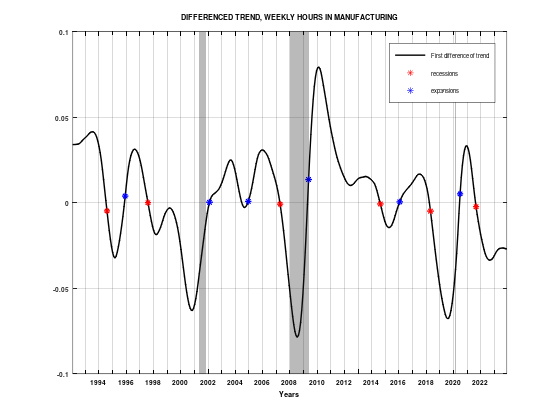

In [96]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')
figure(6)

plot(dates,dtrendidle,'k','linewidth',1.4)
hold on
plot(recessionindidle,recessionidle,'r*','linewidth',1.3) % red are recessions
plot(expansionindidle,expansionidle,'b*','linewidth',1.3) % blue are expansions
grid on

title('DIFFERENCED TREND, WEEKLY HOURS IN MANUFACTURING')
legend('First difference of trend','recessions','expansions')

xlim([startDate endDate]);

years = 1992:2023;
xTicks = datenum(years, 1, 1);
set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);

for i = 2:2:length(xLabels)
    xLabels{i} = ''; % Remove every other label
end
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

recession_periods = [
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;
hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;

In [98]:
disp('DATES OF EXPANSIONS AND RECESSIONS OF AVERAGE WEEKLY HOURS WORKED IN MANUFACTURING')
expansiontimeidle % date when trend derivative > growth rate
recessiontimeidle % date when trend derivative < growth rate
disp('Data presents leading and coincident nature')

DATES OF EXPANSIONS AND RECESSIONS OF AVERAGE WEEKLY HOURS WORKED IN MANUFACTURING
expansiontimeidle =

1996-01-01  
2002-03-01  
2005-01-01  
2009-06-01  
2016-02-01  
2020-07-01  

recessiontimeidle =

1994-09-01  
1997-09-01  
2007-05-01  
2014-09-01  
2018-05-01  
2021-09-01  

Data presents leading and coincident nature


In [97]:
disp('Checking correct indexing')
idle(5)
timeidle(4,:)

Checking correct indexing
ans = 40.900
ans = 1992-06-01  


In [99]:
disp('INDICADOR COMPUESTO')
k=1; # retardo 

b=[trendtrucks,trendidle,trendcapital]';
#b = b(:,1:300);
B=b*(eye(length(b))-ones(length(b))/length(b));
[V,LAMBDA] = eig(B(:,1:length(b)-k)*B(:,k+1:length(b))'/(length(b)^(1)))
% eig= eigenvalue
[m,ix]=max(diag(LAMBDA))
Weights=V(:,ix)./sum(V(:,ix)) 

INDICADOR COMPUESTO
V =

   4.6050e-04   9.9985e-01   1.4506e-02
   2.0151e-05   1.7116e-02  -9.9989e-01
   1.0000e+00  -4.4627e-04   1.1697e-05

LAMBDA =

Diagonal Matrix

   8.0734e+07            0            0
            0   3.8819e+01            0
            0            0   2.2460e-01

m = 8.0734e+07
ix = 1
Weights =

   4.6028e-04
   2.0141e-05
   9.9952e-01



PLOTTING THE COMPOSITE INDICATOR


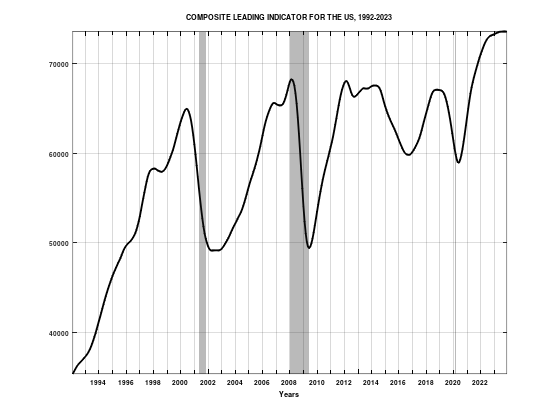

In [104]:
disp('PLOTTING THE COMPOSITE INDICATOR')
cli=b'*Weights;

startDate = datenum(1992, 2, 1);  % February 1992
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(cli));  % Generate dates
dates = dates';  % Ensure dates is a column vector

figure(7)
plot(dates,cli,'linewidth',1.8,'k-')
grid on
title('COMPOSITE LEADING INDICATOR FOR THE US, 1992-2023')
dcli=diff(cli); % first difference composite leading indicator
size(dcli);
size(timeidle);

xlim([startDate endDate]);

years = 1992:2023;
xTicks = datenum(years, 1, 1);
set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);

for i = 2:2:length(xLabels)
    xLabels{i} = ''; % Remove every other label
end
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

recession_periods = [
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

ylim([min(cli) - 2, max(cli) + 1]);  % Adjust as needed

y_lim = ylim;
hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;

In [105]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedreccli = []; % array to store the indices of confirmation of a recession
% Loop through the elements of dcli
for i = 2:(length(dcli) - window + 1) % starts at the 2nd element to see if the first one is preceded by a positive value
    if all(dcli(i:i+window-1) < 0) && dcli(i-1) > 0 
        confirmedreccli = [confirmedreccli, i]; % store the index of the first negative element
    end
end
disp('Indices of the first negative element of dcli preceded by a positive value followed by 6 consecutive negative values:');
confirmedreccli = confirmedreccli'; % convert to column vector from row vector 
recessiontimecli = timeidle(confirmedreccli,:); % DATES OF CONFIRMED RECESSION
recessioncli = dcli(confirmedreccli,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
Indices of the first negative element of dcli preceded by a positive value followed by 6 consecutive negative values:


In [108]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexpcli = []; % array to store the indices of confirmation of an expansion
% Loop through the elements of dcli
for i = 2:(length(dcli) - window + 1) % starts at the 2nd element to see if the first one is preceded by a negative value
    if all(dcli(i:i+window-1) > 0) && dcli(i-1) < 0 
        confirmedexpcli = [confirmedexpcli, i]; % store the index of the first positive element
    end
end
disp('Indices of the first positive element of dcli preceded by a negative value followed by 6 consecutive positive values:');
confirmedexpcli = confirmedexpcli'; % convert to column vector from row vector 
expansiontimecli = timeidle(confirmedexpcli,:); % DATES OF CONFIRMED EXPANSION
expansioncli = dcli(confirmedexpcli,:); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1992, 2, 1);  % February 1992
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dcli));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedrectrucks and confirmedexptrucks indices to dates
recessionindcli = dates(confirmedreccli);
expansionindcli = dates(confirmedexpcli);

CONFIRMATION OF AN EXPANSION
Indices of the first positive element of dcli preceded by a negative value followed by 6 consecutive positive values:


PLOTTING CLI WITH RECESSION AND EXPANSION DATES


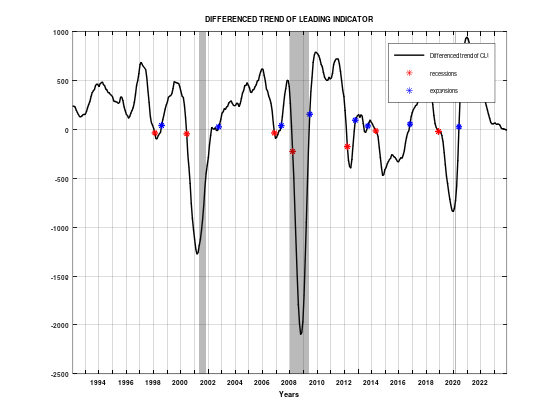

In [112]:
disp('PLOTTING CLI WITH RECESSION AND EXPANSION DATES')
figure(8)

plot(dates,dcli,'k','linewidth',1.4)
hold on
plot(recessionindcli,recessioncli,'r*','linewidth',1.3) % red are recessions
plot(expansionindcli,expansioncli,'b*','linewidth',1.3) % blue are expansions

grid on
title('DIFFERENCED TREND OF LEADING INDICATOR')
legend('Differenced trend of CLI','recessions','expansions')

xlim([startDate endDate]);

years = 1992:2023;
xTicks = datenum(years, 1, 1);
set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);

for i = 2:2:length(xLabels)
    xLabels{i} = ''; % Remove every other label
end
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

recession_periods = [
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;
hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;

In [113]:
disp('DATES OF EXPANSIONS AND RECESSIONS PREDICTED BY THE INDICATOR')
expansiontimecli % date when trend derivative > growth rate
recessiontimecli % date when trend derivative < growth rate
disp('There are some false warning but some leads in some dates')

DATES OF EXPANSIONS AND RECESSIONS PREDICTED BY THE INDICATOR
expansiontimecli =

1998-09-01  
2002-11-01  
2007-06-01  
2009-07-01  
2012-11-01  
2013-10-01  
2016-11-01  
2020-06-01  

recessiontimecli =

1998-03-01  
2000-07-01  
2006-12-01  
2008-04-01  
2012-04-01  
2014-05-01  
2018-12-01  

There are some false warning but some leads in some dates
